In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn

In [2]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0.0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0.0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0.0


In [3]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


# Data Cleaning


**Identifing missing attributes**

In [4]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1161
smoking_status       10611
stroke                   1
dtype: int64

In [5]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

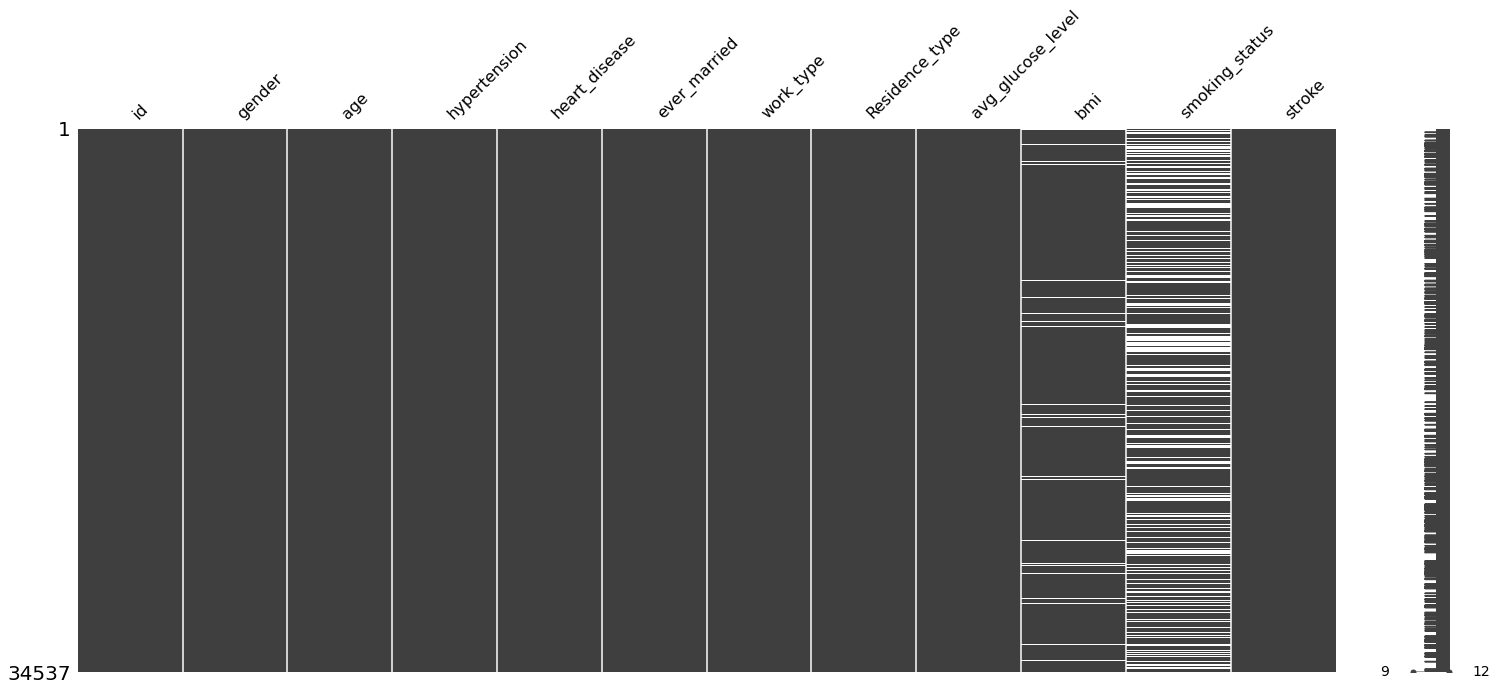

In [6]:
ms.matrix(train)

**Removing missing values**

In [7]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (23103, 12)
test data shape: (12423, 11)


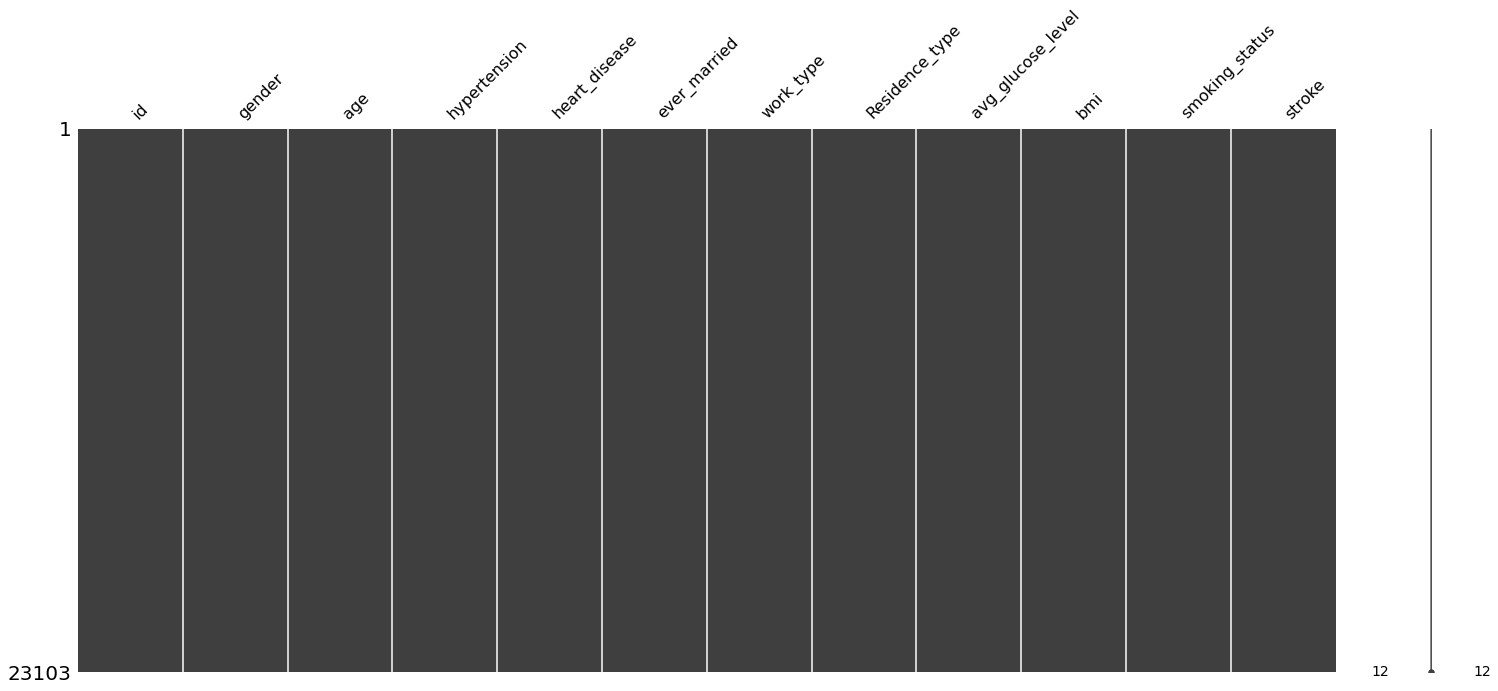

In [8]:
ms.matrix(train_data)

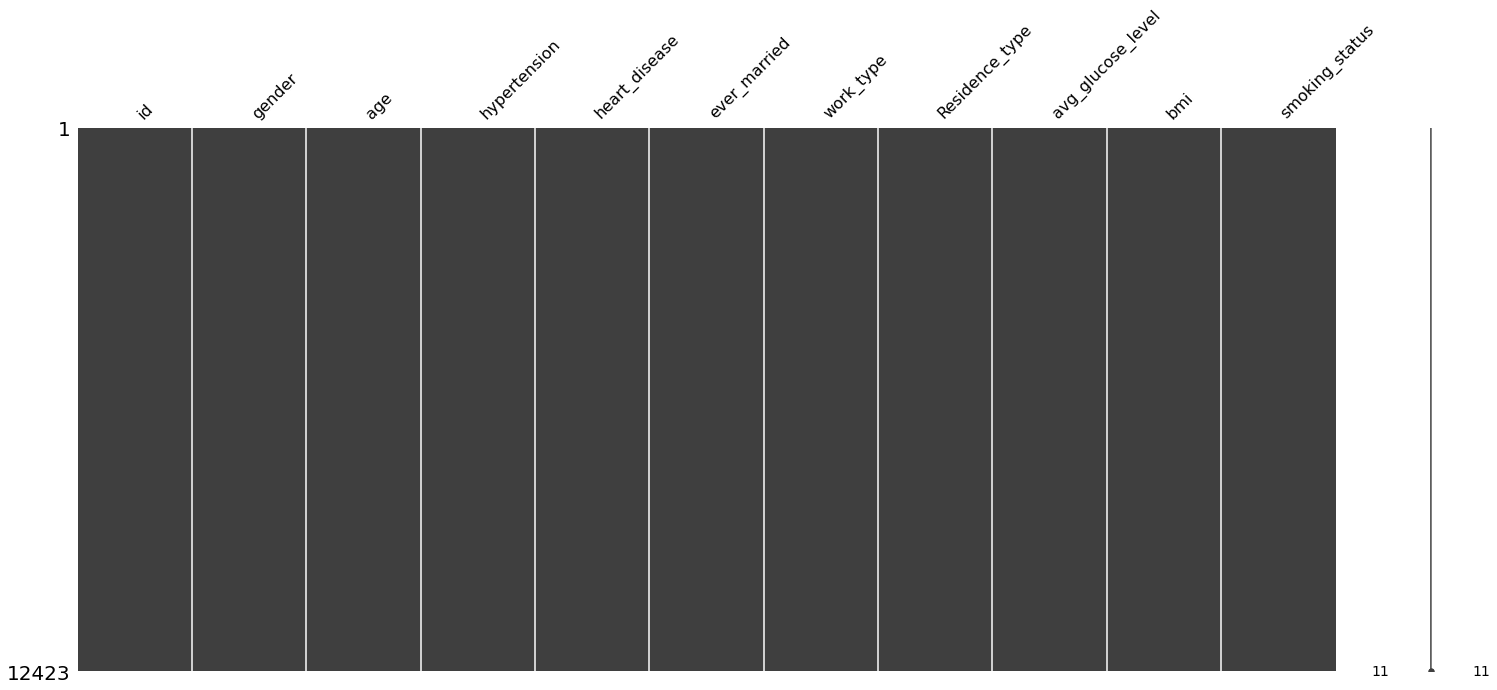

In [9]:
ms.matrix(test_data)

In [10]:
train_data["stroke"].value_counts()

0.0    22682
1.0      421
Name: stroke, dtype: int64

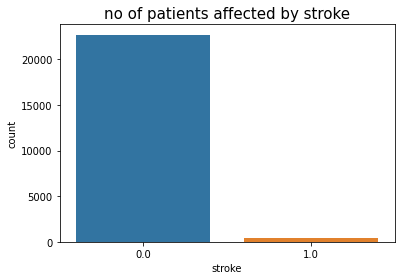

In [11]:
sns.countplot(x=train_data["stroke"])
plt.title("no of patients affected by stroke", fontsize=15)
plt.show()

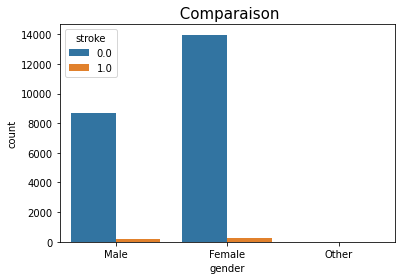

In [13]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title(" Comparaison", fontsize=15)
plt.show()

In [14]:
train_data.groupby(["gender"])["stroke"].value_counts()


gender  stroke
Female  0.0       13965
        1.0         242
Male    0.0        8711
        1.0         179
Other   0.0           6
Name: stroke, dtype: int64

In [15]:
train_data["smoking_status"].value_counts()

never smoked       12513
formerly smoked     5636
smokes              4954
Name: smoking_status, dtype: int64

In [16]:
train_data.groupby(["gender"])["smoking_status"].value_counts()


gender  smoking_status 
Female  never smoked       8254
        formerly smoked    3131
        smokes             2822
Male    never smoked       4258
        formerly smoked    2500
        smokes             2132
Other   formerly smoked       5
        never smoked          1
Name: smoking_status, dtype: int64

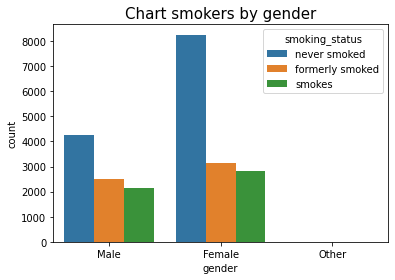

In [18]:
sns.countplot(x=train_data["gender"], hue=train_data["smoking_status"])
plt.title("Chart smokers by gender", fontsize=15)
plt.show()

In [19]:
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

In [20]:
int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0.0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0.0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0.0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0.0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0.0


In [23]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


# Modelling & predicting the data

In [24]:
xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(23103, 11)

In [25]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(23103,)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [27]:
x_test.shape

(5776, 11)

In [28]:
y_test.shape

(5776,)

In [29]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
10231,1,1,2,1,2,18650,78.0,0,1,81.88,30.3
1441,0,1,2,0,1,35432,36.0,0,0,95.36,25.1
31131,0,1,2,1,0,51438,19.0,0,0,157.73,32.0
8054,0,1,2,1,0,17641,58.0,0,0,86.72,33.4
26695,1,1,2,0,1,70252,30.0,0,0,57.22,38.0


In [30]:
y_train.head()

10231    0.0
1441     0.0
31131    0.0
8054     0.0
26695    0.0
Name: stroke, dtype: float64

## Naive_Bayes

In [31]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
20397,0,1,3,1,1,50109,71.0,0,0,199.49,40.8
28640,1,1,2,1,1,3523,73.0,0,0,83.10,27.1
11117,0,1,0,0,2,41044,43.0,0,0,254.65,42.4
16932,0,0,2,1,0,7372,40.0,0,0,79.64,29.2
12656,1,1,3,0,1,49034,70.0,0,0,78.80,34.0


In [32]:
y_test.head()

20397    0.0
28640    0.0
11117    0.0
16932    0.0
12656    0.0
Name: stroke, dtype: float64

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [35]:
predict=model.predict(x_test)
predict

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)           

NBtest_score: 0.9726454293628809


### Confusion matrix

In [37]:
nb_conf_mtr=pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0.0,1.0
stroke,,
0.0,5613,47
1.0,111,5


### Report for Naive_Bayes 

In [38]:
from sklearn.metrics import classification_report

In [39]:
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      5660
         1.0       0.10      0.04      0.06       116

    accuracy                           0.97      5776
   macro avg       0.54      0.52      0.52      5776
weighted avg       0.96      0.97      0.97      5776



## Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9634695290858726


### Reports for decision tree

In [48]:
dectree_report=classification_report(y_test, y_predict)
print(dectree_report)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5660
         1.0       0.10      0.10      0.10       116

    accuracy                           0.96      5776
   macro avg       0.54      0.54      0.54      5776
weighted avg       0.96      0.96      0.96      5776



In [49]:
dt_conf_mtr=pd.crosstab(y_test, y_predict)
dt_conf_mtr

col_0,0.0,1.0
stroke,,
0.0,5553,107
1.0,104,12



### Random Forest

In [50]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)

In [51]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred_rfc = rfc.predict(x_test)

In [53]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0    0.0
stroke      
0.0     5660
1.0      116
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5660
         1.0       0.00      0.00      0.00       116

    accuracy                           0.98      5776
   macro avg       0.49      0.50      0.49      5776
weighted avg       0.96      0.98      0.97      5776



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
mlp=MLPClassifier()

In [56]:
mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

In [57]:
mlp.score(x_test,y_test)

0.9799168975069252

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9761071915397175

In [59]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9621697449033089

In [60]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.981777288455489

In [61]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9803920070702075

### Applying PCA

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(xtrain)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [64]:
model_2=GaussianNB()
model_2.fit(x_train, y_train)

GaussianNB()

In [65]:
test_score=model_2.score(x_test, y_test)
print("NBtest_score:", test_score)  

NBtest_score: 0.9759349030470914


In [66]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9605263157894737


In [68]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred_rfc = rfc.predict(x_test)

In [70]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0    0.0
stroke      
0.0     5672
1.0      104
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5672
         1.0       0.00      0.00      0.00       104

    accuracy                           0.98      5776
   macro avg       0.49      0.50      0.50      5776
weighted avg       0.96      0.98      0.97      5776



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
rfc.score(x_test,y_test)

0.981994459833795

In [72]:

mlp=MLPClassifier()

mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

mlp.score(x_test,y_test)

0.981994459833795

In [73]:
cross_val_score(model_2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9761071915397175

In [74]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9612175511915997

In [75]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.981777288455489

In [76]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9810846477628482